https://realpython.com/python-opencv-color-spaces/

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

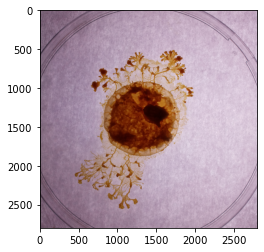

In [9]:
img = cv2.imread('./images-originals/tl10-168.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [10]:
#resize for quicker processing
dim = (224, 224)
img = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)

# Visualizing the img in RGB color space (3D scatter plot)

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

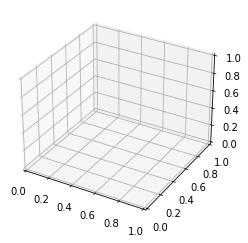

In [10]:
r, g, b = cv2.split(img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

In [11]:
pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

In [13]:
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

# Visualizing Nemo in HSV Color Space

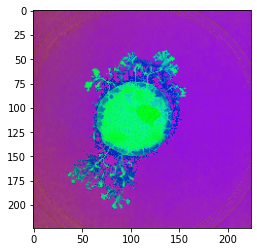

In [14]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)
plt.show()

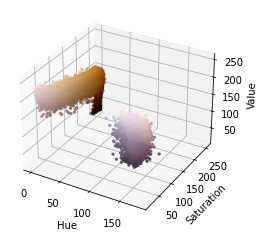

In [39]:
# To visualize th 3d scatter plot in HSV color space
h, s, v = cv2.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

# Picking Out a Range

(0.4166666666666667, 0.5, 0.4)


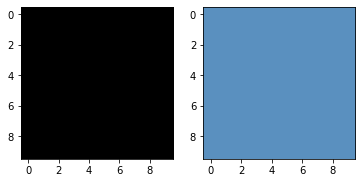

In [18]:
import colorsys
rgb_col = (166, 112, 65)
#rgb_col = (166/255, 112/255, 65/255)
hsv_col = colorsys.rgb_to_hsv(0.2, 0.4, 0.3)
print(hsv_col)
l_square = np.full((10, 10, 3), rgb_col, dtype=np.uint8) *255
d_square = np.full((10, 10, 3), hsv_col, dtype=np.uint8) 
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(d_square))
plt.subplot(1, 2, 2)
plt.imshow(l_square)
plt.show()

In [62]:
from matplotlib.colors import hsv_to_rgb
light_blob = (0, 0, 0)#(24, 26, 78) #9e672f
dark_blob = (100, 90, 255)

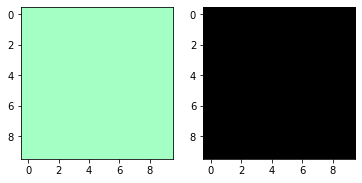

In [63]:
lb_square = np.full((10, 10, 3), light_blob, dtype=np.uint8) / 255
db_square = np.full((10, 10, 3), dark_blob, dtype=np.uint8) / 255
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(db_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lb_square))
plt.show()

# Masking

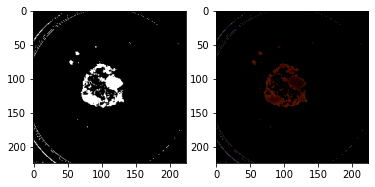

True

In [64]:
mask = cv2.inRange(img, light_blob, dark_blob)
result = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()
cv2.imwrite("./images-originals/mask.jpg", mask)
cv2.imwrite("./images-originals/result.jpg", result)

# Trackbars to get how cv2.range works
https://theailearner.com/tag/cv2-inrange-opencv-python/

In [60]:
import cv2
import numpy as np
 
def nothing(x):
    pass
 
# Open the camera
cap = cv2.VideoCapture(0) 
 
# Create a window
cv2.namedWindow('image')
 
# create trackbars for color change
cv2.createTrackbar('lowH','image',0,179,nothing)
cv2.createTrackbar('highH','image',179,179,nothing)
 
cv2.createTrackbar('lowS','image',0,255,nothing)
cv2.createTrackbar('highS','image',255,255,nothing)
 
cv2.createTrackbar('lowV','image',0,255,nothing)
cv2.createTrackbar('highV','image',255,255,nothing)
 
while(True):
    ret, frame = cap.read()
 
    # get current positions of the trackbars
    ilowH = cv2.getTrackbarPos('lowH', 'image')
    ihighH = cv2.getTrackbarPos('highH', 'image')
    ilowS = cv2.getTrackbarPos('lowS', 'image')
    ihighS = cv2.getTrackbarPos('highS', 'image')
    ilowV = cv2.getTrackbarPos('lowV', 'image')
    ihighV = cv2.getTrackbarPos('highV', 'image')
    
    # convert color to hsv because it is easy to track colors in this color model
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_hsv = np.array([ilowH, ilowS, ilowV])
    higher_hsv = np.array([ihighH, ihighS, ihighV])
    # Apply the cv2.inrange method to create a mask
    mask = cv2.inRange(hsv, lower_hsv, higher_hsv)
    # Apply the mask on the image to extract the original color
    frame = cv2.bitwise_and(frame, frame, mask=mask)
    cv2.imshow('image', frame)
    # Press q to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
 
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2581: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


In [42]:
import cv2
import numpy as np
 
def nothing(x):
    pass
 
# use img instead of cam
m_img = img
 
# Create a window
cv2.namedWindow('image')
 
# create trackbars for color change
cv2.createTrackbar('lowH','image',0,179,nothing)
cv2.createTrackbar('highH','image',179,179,nothing)
 
cv2.createTrackbar('lowS','image',0,255,nothing)
cv2.createTrackbar('highS','image',255,255,nothing)
 
cv2.createTrackbar('lowV','image',0,255,nothing)
cv2.createTrackbar('highV','image',255,255,nothing)
 
while(True):
    #ret, frame = cap.read()
 
    # get current positions of the trackbars
    ilowH = cv2.getTrackbarPos('lowH', 'image')
    ihighH = cv2.getTrackbarPos('highH', 'image')
    ilowS = cv2.getTrackbarPos('lowS', 'image')
    ihighS = cv2.getTrackbarPos('highS', 'image')
    ilowV = cv2.getTrackbarPos('lowV', 'image')
    ihighV = cv2.getTrackbarPos('highV', 'image')
    
    # convert color to hsv because it is easy to track colors in this color model
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    lower_hsv = np.array([ilowH, ilowS, ilowV])
    higher_hsv = np.array([ihighH, ihighS, ihighV])
    # Apply the cv2.inrange method to create a mask
    mask = cv2.inRange(hsv, lower_hsv, higher_hsv)
    # Apply the mask on the image to extract the original color
    m_img = cv2.bitwise_and(m_img, m_img, mask=mask)
    cv2.imshow('image', m_img)
    # Press q to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
 
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2581: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'
